### DTS - Complete Streets

# 10 - Results Summary

**Author:** rmangan

**Purpose:**

Summarizes analysis results into key metrics for final report. 

**This script performs the following functions:**

1. Load modal composite feature class from geodatabase to spatially enabled dataframe
2. Add & calcualte various dataframe fields
3. Define sumarization metric values
4. Print out final summarization metric values

**Global Assumptions and Notes:**
1. item
2. item
3. item

**Non-Standard Python Modules utilized:**
1. arcpy 2.7 - required for reading file geodatabase data
2. arcgis 1.83 - required for creating spatial data frame
2. pandas 1.1 - used for results summarization

In [1]:
# import modules
import arcpy
import os
import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS

In [2]:
# define variables

# Input Datasets
modal_composite = r"\\dc1vs01\GISProj\H\Honolulu_DTS\D3409300_RailActivation\GeoData\GDB\Modal\Modal Composite 5_3.gdb\modal_composite_05_3"

In [3]:
# define functions

def percent(part,total):
    #return percent
    percent = round(((part/total)*100),3)
    return percent

### Dataframe operations
create new fields, calculate values, etc.

In [4]:
#Create DF for analysis
df = pd.DataFrame.spatial.from_featureclass(modal_composite)

In [5]:
#rename land value field
df = df.rename(columns={"LandValue":"Land Value Metric"})

#create new field for future row area & calculate value
df["row_area_future"] = df["row_width_future"] * df["length_ft"]


#add df fields for land value estimates
#land value metric is median land value ($/sq.ft) of all parcels within 1/4 mile of street segment

#total ROW
df["row_LV"] = df["mean_row_area"] * df["Land Value Metric"]

#future ROW (if 1986 future greater than 2020 estimate)
df["row_future_LV"] = df["row_area_future"] * df["Land Value Metric"]


#auto
df["modal_area_auto_exist_LV"] = df["modal_area_auto_exist"] * df["Land Value Metric"]
df["modal_area_auto_prop_LV"] = df["modal_area_auto_prop"] * df["Land Value Metric"]
df["modal_area_auto_const_LV"] = df["modal_area_auto_const"] * df["Land Value Metric"]


#bike
df["modal_area_bike_exist_LV"] = df["modal_area_bike_exist"] * df["Land Value Metric"]
df["modal_area_bike_prop_LV"] = df["modal_area_bike_prop"] * df["Land Value Metric"]
df["modal_area_bike_const_LV"] = df["modal_area_bike_const"] * df["Land Value Metric"]


#medians
df["modal_area_medians_exist_LV"] = df["modal_area_medians_exist"] * df["Land Value Metric"]
df["modal_area_medians_prop_LV"] = df["modal_area_medians_prop"] * df["Land Value Metric"]
df["modal_area_medians_const_LV"] = df["modal_area_medians_const"] * df["Land Value Metric"]


#parking
df["modal_area_park_exist_LV"] = df["modal_area_park_exist"] * df["Land Value Metric"]
df["modal_area_park_prop_LV"] = df["modal_area_park_prop"] * df["Land Value Metric"]
df["modal_area_park_const_LV"] = df["modal_area_park_const"] * df["Land Value Metric"]


#Ped
df["modal_area_ped_exist_LV"] = df["modal_area_ped_exist"] * df["Land Value Metric"]
df["modal_area_ped_prop_LV"] = df["modal_area_ped_prop"] * df["Land Value Metric"]
df["modal_area_ped_const_LV"] = df["modal_area_ped_const"] * df["Land Value Metric"]


#Bus
df["modal_area_bus_exist_LV"] = df["modal_area_bus_exist"] * df["Land Value Metric"]
df["modal_area_bus_prop_LV"] = df["modal_area_bus_prop"] * df["Land Value Metric"]
df["modal_area_bus_const_LV"] = df["modal_area_bus_const"] * df["Land Value Metric"]

In [6]:
#field to use in subsequent dataframe queries 

fields = [
    "SEGMENTID",              #0
    "length_ft",              #1
    "FULLNAME",               #2
    "CS_type",                #3      
    "mean_row_2020",          #4
    "modal_width_max",        #5
    "modal_width_max_diff",   #6
    "modal_width_const",      #7
    "modal_width_const_diff", #8          
    "modal_area_auto_exist",  #9
    "modal_area_auto_prop",   #10
    "modal_area_auto_const",  #11         
    "modal_area_bike_exist",  #12
    "modal_area_bike_prop",   #13
    "modal_area_bike_const",  #14         
    "modal_area_park_exist",  #15
    "modal_area_park_prop",   #16
    "modal_area_park_const",  #17         
    "modal_area_ped_exist",   #18
    "modal_area_ped_prop",    #19
    "modal_area_ped_const",   #20
    "mean_row_area",           #21
    "modal_area_medians_exist",  #22
    "modal_area_medians_prop",   #23
    "modal_area_medians_const",  #24         
    "modal_area_bus_exist",  #25
    "modal_area_bus_prop",   #26
    "modal_area_bus_const",  #27
    "row_area_future"   #28
]

In [7]:
#Filters for Dataframe
# (needs cleanup)

f_owner = (df["OWNER"] == "CITY") | (df["OWNER"] == "City") | (df["OWNER"] == "VARIOUS")

f_bike_exist_sharedroad = (df["Fac_Type_BE"] == "Shared Roadway")
f_bike_exist_sharedpath = (df["Fac_Type_BE"] == "Shared Use Path")

f_bike_exist_distinct = ~ ((df["Fac_Type_BE"] == "Shared Roadway") | (df["Fac_Type_BE"] == "Shared Use Path"))

f_bike_prop_sharedroad = (df["Fac_Type_BP"] == "Shared Roadway")
f_bike_redev_sharedroad = (df["Fac_Type_BR"] == "Shared Roadway")

f_bike_prop_sharedpath = (df["Fac_Type_BP"] == "Shared Use Path")
f_bike_redev_sharedpath = (df["Fac_Type_BR"] == "Shared Use Path")

f_bike_prop_distinct = ~(f_bike_prop_sharedroad  | f_bike_redev_sharedroad | f_bike_prop_sharedpath | f_bike_redev_sharedpath )

f_reductions = (df["modal_width_max"] > df["modal_width_const"])

f_unconst_over = df["modal_width_max_diff"] >= 0
f_unconst_under = df["modal_width_max_diff"] <= 0

f_const_over = df["modal_width_const_diff"] >= 0
f_const_under = df["modal_width_const_diff"] <= 0

f_ej = df["ej_percent"] > .5
f_slr = df["SLR_percent"] > .5

#### Define Overal Metrics

In [8]:
total_miles = round(df.loc[:, fields].sum()[1]/5280)
total_miles_ej = round(df.loc[f_ej, fields].sum()[1]/5280)
total_miles_slr = round(df.loc[f_slr, fields].sum()[1]/5280)
total_area = round(df.loc[:, fields].sum()[21]/43560)

#Project (Owner = City & Various)
project_miles = round(df.loc[f_owner, fields].sum()[1]/5280)
project_miles_ej = round(df.loc[f_owner & f_ej, fields].sum()[1]/5280)
project_miles_slr = round(df.loc[f_owner & f_slr, fields].sum()[1]/5280)
project_area = round(df.loc[f_owner, fields].sum()[21]/43560)
project_area_future = round(df.loc[f_owner, fields].sum()[28]/43560)


unconst_over = round(df.loc[f_unconst_over & f_owner,fields].sum()[1]/5280)
unconst_under = round(df.loc[f_unconst_under & f_owner,fields].sum()[1]/5280)

const_over = round(df.loc[f_const_over & f_owner,fields].sum()[1]/5280)
const_under = round(df.loc[f_const_under & f_owner,fields].sum()[1]/5280)

land_value = (round(df["row_LV"].sum()/1000000))
land_value_future = (round(df["row_future_LV"].sum()/1000000))

land_value_proj = (round(df.loc[f_owner,"row_LV"].sum()/1000000))
land_value_proj_future = (round(df.loc[f_owner,"row_future_LV"].sum()/1000000))

#### Define Individual Modal Metrics

In [9]:
#auto
auto_area_exist = round(df.loc[f_owner,fields].sum()[9]/43560)
auto_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[9]/43560)
auto_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[9]/43560)

auto_area_prop = round(df.loc[f_owner,fields].sum()[10]/43560)
auto_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[10]/43560)
auto_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[10]/43560)

auto_area_const = round(df.loc[f_owner,fields].sum()[11]/43560)
auto_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[11]/43560)
auto_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[11]/43560)

auto_current_value = (round(df.loc[f_owner,"modal_area_auto_exist_LV"].sum()/1000000))
auto_prop_value = (round(df.loc[f_owner,"modal_area_auto_prop_LV"].sum()/1000000))
auto_const_value = (round(df.loc[f_owner,"modal_area_auto_const_LV"].sum()/1000000))

In [10]:
#bike
bike_area_exist = round(df.loc[f_owner,fields].sum()[12]/43560)
bike_area_exist_distinct = round(df.loc[f_owner & f_bike_exist_distinct,fields].sum()[12]/43560)

bike_area_exist_sharedroad = round(df.loc[f_owner & f_bike_exist_sharedroad,fields].sum()[12]/43560)
bike_area_exist_sharedpath = round(df.loc[f_owner & f_bike_exist_sharedpath,fields].sum()[12]/43560)

bike_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[12]/43560)
bike_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[12]/43560)

bike_area_exist_distinct_ej = round(df.loc[f_owner & f_bike_exist_distinct & f_ej,fields].sum()[12]/43560)
bike_area_exist_distinct_slr = round(df.loc[f_owner & f_bike_exist_distinct & f_slr,fields].sum()[12]/43560)

bike_area_prop = round(df.loc[f_owner,fields].sum()[13]/43560)
bike_area_prop_distinct = round(df.loc[f_owner & f_bike_prop_distinct,fields].sum()[13]/43560)

bike_area_prop_sharedroad = round(df.loc[f_owner & (f_bike_prop_sharedroad | f_bike_redev_sharedroad),fields].sum()[13]/43560)
bike_area_prop_sharedpath = round(df.loc[f_owner & (f_bike_prop_sharedpath | f_bike_redev_sharedpath),fields].sum()[13]/43560)

bike_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[13]/43560)
bike_area_prop_distinct_ej = round(df.loc[f_owner & f_bike_prop_distinct & f_ej,fields].sum()[13]/43560)
bike_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[13]/43560)
bike_area_prop_distinct_slr = round(df.loc[f_owner & f_bike_prop_distinct & f_slr,fields].sum()[13]/43560)

bike_area_const = round(df.loc[f_owner,fields].sum()[14]/43560)
bike_area_const_distinct = round(df.loc[f_owner & f_bike_prop_distinct,fields].sum()[14]/43560)

bike_area_const_sharedroad = round(df.loc[f_owner & (f_bike_prop_sharedroad | f_bike_redev_sharedroad),fields].sum()[14]/43560)
bike_area_const_sharedpath = round(df.loc[f_owner & (f_bike_prop_sharedpath | f_bike_redev_sharedpath),fields].sum()[14]/43560)

bike_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[14]/43560)
bike_area_const_distinct_ej = round(df.loc[f_owner & f_bike_prop_distinct & f_ej,fields].sum()[14]/43560)
bike_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[14]/43560)
bike_area_const_distinct_slr = round(df.loc[f_owner & f_bike_prop_distinct & f_slr,fields].sum()[14]/4356)
                            
bike_current_value = (round(df.loc[f_owner,"modal_area_bike_exist_LV"].sum()/1000000))
bike_distinct_current_value = (round(df.loc[f_owner & f_bike_exist_distinct,"modal_area_bike_exist_LV"].sum()/1000000))

bike_prop_value = (round(df.loc[f_owner,"modal_area_bike_prop_LV"].sum()/1000000))
bike_prop_distinct_value = (round(df.loc[f_owner & f_bike_prop_distinct,"modal_area_bike_prop_LV"].sum()/1000000))

bike_const_value = (round(df.loc[f_owner,"modal_area_bike_const_LV"].sum()/1000000))
bike_const_distinct_value = (round(df.loc[f_owner & f_bike_prop_distinct,"modal_area_bike_const_LV"].sum()/1000000))

In [11]:
#medians
medians_area_exist = round(df.loc[f_owner,fields].sum()[22]/43560)
medians_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[22]/43560)
medians_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[22]/43560)

medians_area_prop = round(df.loc[f_owner,fields].sum()[23]/43560)
medians_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[23]/43560)
medians_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[23]/43560)

medians_area_const = round(df.loc[f_owner,fields].sum()[24]/43560)
medians_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[24]/43560)
medians_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[24]/43560)

medians_current_value = (round(df.loc[f_owner,"modal_area_medians_exist_LV"].sum()/1000000))
medians_prop_value = (round(df.loc[f_owner,"modal_area_medians_prop_LV"].sum()/1000000))
medians_const_value = (round(df.loc[f_owner,"modal_area_medians_const_LV"].sum()/1000000))

In [12]:
#parking
park_area_exist = round(df.loc[f_owner,fields].sum()[15]/43560)
park_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[15]/43560)
park_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[15]/43560)

park_area_prop = round(df.loc[f_owner,fields].sum()[16]/43560)
park_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[16]/43560)
park_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[16]/43560)

park_area_const = round(df.loc[f_owner,fields].sum()[17]/43560)
park_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[17]/43560)
park_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[17]/43560)

park_current_value = (round(df.loc[f_owner,"modal_area_park_exist_LV"].sum()/1000000))
park_prop_value = (round(df.loc[f_owner,"modal_area_park_prop_LV"].sum()/1000000))
park_const_value = (round(df.loc[f_owner,"modal_area_park_const_LV"].sum()/1000000))

In [13]:
#Ped
ped_area_exist = round(df.loc[f_owner,fields].sum()[18]/43560)
ped_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[18]/43560)
ped_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[18]/43560)

ped_area_prop = round(df.loc[f_owner,fields].sum()[19]/43560)
ped_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[19]/43560)
ped_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[19]/43560)

ped_area_const = round(df.loc[f_owner,fields].sum()[20]/43560)
ped_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[20]/43560)
ped_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[20]/43560)

ped_current_value = (round(df.loc[f_owner,"modal_area_ped_exist_LV"].sum()/1000000))
ped_prop_value = (round(df.loc[f_owner,"modal_area_ped_prop_LV"].sum()/1000000))
ped_const_value = (round(df.loc[f_owner,"modal_area_ped_const_LV"].sum()/1000000))

In [14]:
#bus
bus_area_exist = round(df.loc[f_owner,fields].sum()[25]/43560)
bus_area_exist_ej = round(df.loc[f_owner & f_ej,fields].sum()[25]/43560)
bus_area_exist_slr = round(df.loc[f_owner & f_slr,fields].sum()[25]/43560)

bus_area_prop = round(df.loc[f_owner,fields].sum()[26]/43560)
bus_area_prop_ej = round(df.loc[f_owner & f_ej,fields].sum()[26]/43560)
bus_area_prop_slr = round(df.loc[f_owner & f_slr,fields].sum()[26]/43560)

bus_area_const = round(df.loc[f_owner,fields].sum()[27]/43560)
bus_area_const_ej = round(df.loc[f_owner & f_ej,fields].sum()[27]/43560)
bus_area_const_slr = round(df.loc[f_owner & f_slr,fields].sum()[27]/43560)

bus_current_value = (round(df.loc[f_owner,"modal_area_bus_exist_LV"].sum()/1000000))
bus_prop_value = (round(df.loc[f_owner,"modal_area_bus_prop_LV"].sum()/1000000))
bus_const_value = (round(df.loc[f_owner,"modal_area_bus_const_LV"].sum()/1000000))

After defining all metrics as variables, load the metrics to a new pandas dataframe for easier visualization and reporting. 


In [31]:
#load summary metrics to new dataframe for reporting & plotting

#load metric variables to dict, key will be column name, values will be rows
results_dict = {'Metric Category': ["All Data", 
                                "City Streets",
                                "Auto",
                                "Auto",
                                "Auto",
                                "Bike",
                                "Bike",
                                "Bike",
                                "Medians",
                                "Medians",
                                "Medians",
                                "Parking",
                                "Parking",
                                "Parking",
                                "Bus",
                                "Bus",
                                "Bus"
                               ],
                'Scenario': [
                    "Existing",
                    "Existing",
                    "Existing",
                    "Proposed",
                    "Constrained",
                    "Existing",
                    "Proposed",
                    "Constrained",
                    "Existing",
                    "Proposed",
                    "Constrained",
                    "Existing",
                    "Proposed",
                    "Constrained",
                    "Existing",
                    "Proposed",
                    "Constrained"
                            ],
                'Miles': [
                    total_miles,
                    project_miles,
                    None, #Null for Auto Miles
                     None, #Null for Auto Miles
                     None, #Null for Auto Miles
                     None, #Null for Bike Miles
                     None, #Null for Bike Miles
                     None, #Null for Bike Miles
                     None, #Null for Median Miles
                     None, #Null for Median Miles
                     None, #Null for Median Miles
                     None, #Null for Parking Miles
                     None, #Null for Parking Miles
                     None, #Null for Parking Miles
                     None, #Null for Bus Miles
                     None, #Null for Bus Miles
                     None, #Null for Bus Miles
                         ],
                'Area (acres)': [
                    total_area,
                    project_area,
                    auto_area_exist,
                    auto_area_prop,
                    auto_area_const,
                    bike_area_exist_distinct,
                    bike_area_prop_distinct,
                    bike_area_const_distinct,
                    medians_area_exist,
                    medians_area_prop,
                    medians_area_const,
                    park_area_exist,
                    park_area_prop,
                    park_area_const,
                    bus_area_exist,
                    bus_area_prop,
                    bus_area_const],
                'Land Value ($M USD)': [
                    land_value,
                    land_value_proj,
                    auto_current_value,
                    auto_prop_value,
                    auto_const_value,
                    bike_distinct_current_value,
                    bike_prop_distinct_value,
                    bike_const_distinct_value,
                    medians_current_value,
                    medians_prop_value,
                    medians_const_value,
                    park_current_value,
                    park_prop_value,
                    park_const_value,
                    bus_current_value,
                    bus_prop_value,
                    bus_const_value],
                'EJ Acres': [
                    None, #NEEDS UPDATE
                    None, #NEEDS UPDATE
                    auto_area_exist_ej,
                    auto_area_prop_ej,
                    auto_area_const_ej,
                    bike_area_exist_distinct_ej,
                    bike_area_prop_distinct_ej,
                    bike_area_const_distinct_ej,
                    medians_area_exist_ej,
                    medians_area_prop_ej,
                    medians_area_const_ej,
                    park_area_exist_ej,
                    park_area_prop_ej,
                    park_area_const_ej,
                    bus_area_exist_ej,
                    bus_area_prop_ej,
                    bus_area_const_ej],
                'SLR Acres': [
                    None, #needs update
                    None, #needs update
                    auto_area_exist_slr,
                    auto_area_prop_slr,
                    auto_area_const_slr,
                    bike_area_exist_distinct_slr,
                    bike_area_prop_distinct_slr,
                    bike_area_const_distinct_slr,
                    medians_area_exist_slr,
                    medians_area_prop_slr,
                    medians_area_const_slr,
                    park_area_exist_slr,
                    park_area_prop_slr,
                    park_area_const_slr,
                    bus_area_exist_slr,
                    bus_area_prop_slr,
                    bus_area_const_slr]
               }



In [ ]:
#create new df from dict
new_df = pd.DataFrame.from_dict(results_dict)

In [57]:
#add new fields to the DF

#create new field EJ %
new_df["EJ % (by area)"] = (new_df["EJ Acres"] / new_df["Area (acres)"])*100

#create new field EJ %
new_df["SLR % (by area)"] = (new_df["SLR Acres"] / new_df["Area (acres)"])*100

#create new field for Metric Label
new_df["Metric Description"] = new_df["Metric Category"] +" " + new_df["Scenario"]

In [58]:
#print out new DF for review
new_df

,Metric Category,Scenario,Miles,Area (acres),Land Value ($M USD),EJ Acres,SLR Acres,EJ % (by area),SLR % (by area),Metric Description
0,All Data,Existing,2059.0,14838,58870,NaN,NaN,NaN,NaN,All Data Existing
1,City Streets,Existing,1449.0,9603,43584,NaN,NaN,NaN,NaN,City Streets Existing
2,Auto,Existing,NaN,4434,20938,889.0,85.0,20.049617,1.917005,Auto Existing
3,Auto,Proposed,NaN,4510,21326,901.0,87.0,19.977827,1.929047,Auto Proposed
4,Auto,Constrained,NaN,4498,21250,901.0,87.0,20.031125,1.934193,Auto Constrained
5,Bike,Existing,NaN,46,297,9.0,1.0,19.565217,2.173913,Bike Existing
6,Bike,Proposed,NaN,257,1466,53.0,7.0,20.622568,2.723735,Bike Proposed
7,Bike,Constrained,NaN,241,1340,50.0,52.0,20.746888,21.576763,Bike Constrained
8,Medians,Existing,NaN,150,663,30.0,1.0,20.000000,0.666667,Medians Existing
9,Medians,Proposed,NaN,150,663,30.0,1.0,20.000000,0.666667,Medians Proposed


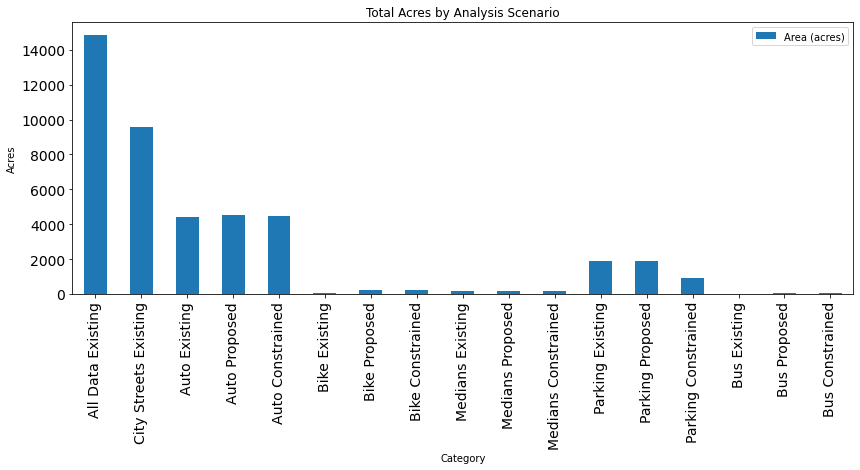

In [82]:
bar = new_df.plot.bar(y="Area (acres)",
                       x="Metric Description",
                       figsize=(14,5),
                       fontsize=14,
                       xlabel = "Category",
                       rot=90,
                       ylabel="Acres",
                       logy=False,
                       title="Total Acres by Analysis Scenario"
                
               )

#### Print Metrics (QC during ouput dataframe development)

improvements: generate a dataframe that contains metric information (DONE) - remove when QC complete

In [26]:
#Overall

print("\n#Totals (all data)#")
print("Miles: {0:,}".format(total_miles))
print("Acres: {0:,} (${1:,}M)".format(total_area,land_value))
print("EJ: {0:,} ({1}%)".format(total_miles_ej, percent(total_miles_ej, total_miles)))
print("SLR: {0:,} ({1}%)".format(total_miles_slr,percent(total_miles_slr,total_miles)))


print("\n#Totals (City & Various)#")
print("Miles: {0:,}".format(project_miles))
print("Acres: {0:,} (${1:,}M)".format(project_area,land_value_proj))
print("Acres (future): {0:,} (${1:,}M)".format(project_area_future,land_value_proj))
print("EJ: {0:,} ({1}%)".format(project_miles_ej, percent(project_miles_ej, project_miles)))
print("SLR: {0:,} ({1}%)".format(project_miles_slr,percent(project_miles_slr,project_miles)))


print("\n#Unconstrained Modal#")
print("Miles where Width > ROW: {0:,} ({1}%)".format(unconst_over, percent(unconst_over,project_miles)))
print("Miles where Width < ROW: {0:,} ({1}%)".format(unconst_under, percent(unconst_under,project_miles)))

print("\n#Constrained Modal#")
print("Miles where Width > ROW: {0:,} ({1}%)".format(const_over, percent(const_over,project_miles)))
print("Miles where Width < ROW: {0:,} ({1}%)".format(const_under, percent(const_under,project_miles) ))


#Totals (all data)#
Miles: 2,059
Acres: 14,838 ($58,870M)
EJ: 539 (26.178%)
SLR: 49 (2.38%)

#Totals (City & Various)#
Miles: 1,449
Acres: 9,603 ($43,584M)
Acres (future): 9,781 ($43,584M)
EJ: 303 (20.911%)
SLR: 27 (1.863%)

#Unconstrained Modal#
Miles where Width > ROW: 716 (49.413%)
Miles where Width < ROW: 788 (54.382%)

#Constrained Modal#
Miles where Width > ROW: 218 (15.045%)
Miles where Width < ROW: 1,290 (89.027%)


In [27]:
#Individual Modal Types

#Auto
print("\n#Individual Modal Metrics (acres)")
print("\n#Auto#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(auto_area_exist,
                                                                           auto_current_value,
                                                                           auto_area_exist_ej,
                                                                           percent(auto_area_exist_ej,auto_area_exist),
                                                                           auto_area_exist_slr,
                                                                           percent(auto_area_exist_slr,auto_area_exist)))
print("Prop: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(auto_area_prop,
                                                                           auto_prop_value,
                                                                           auto_area_prop_ej,
                                                                           percent(auto_area_prop_ej,auto_area_prop),
                                                                           auto_area_prop_slr,
                                                                           percent(auto_area_prop_slr,auto_area_prop)))
print("Const: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(auto_area_const,
                                                                           auto_const_value,
                                                                           auto_area_const_ej,
                                                                           percent(auto_area_const_ej,auto_area_const),
                                                                           auto_area_const_slr,
                                                                           percent(auto_area_const_slr,auto_area_const)))


#Individual Modal Metrics (acres)

#Auto#
Exist: 4,434 ($20,938M), EJ: 889 (20.05%), SLR: 85 (1.917%)
Prop: 4,510 ($21,326M), EJ: 901 (19.978%), SLR: 87 (1.929%)
Const: 4,498 ($21,250M), EJ: 901 (20.031%), SLR: 87 (1.934%)


In [34]:
print("\n#Bike#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_exist,
                                                                           bike_current_value,
                                                                           bike_area_exist_ej,
                                                                           percent(bike_area_exist_ej,bike_area_exist),
                                                                           bike_area_exist_slr,
                                                                           percent(bike_area_exist_slr,bike_area_exist)))

print("Exist (Distinct): {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_exist_distinct,
                                                                           bike_distinct_current_value,
                                                                           bike_area_exist_distinct_ej,
                                                                           percent(bike_area_exist_distinct_ej,bike_area_exist),
                                                                           bike_area_exist_distinct_slr,
                                                                           percent(bike_area_exist_distinct_slr,bike_area_exist)))

print("Shared Roadway: {0}".format(bike_area_exist_sharedroad))
print("Shared Use Path: {0}".format(bike_area_exist_sharedpath))
print("\nProp: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_prop,
                                                                           bike_prop_value,
                                                                           bike_area_prop_ej,
                                                                           percent(bike_area_prop_ej,bike_area_prop),
                                                                           bike_area_prop_slr,
                                                                           percent(bike_area_prop_slr,bike_area_prop)))
print("Prop (Distinct): {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_prop_distinct,
                                                                           bike_prop_distinct_value,
                                                                           bike_area_prop_distinct_ej,
                                                                           percent(bike_area_prop_distinct_ej,bike_area_prop),
                                                                           bike_area_prop_distinct_slr,
                                                                           percent(bike_area_prop_distinct_slr,bike_area_prop)))

print("Shared Roadway: {0}".format(bike_area_prop_sharedroad))
print("Shared Use Path: {0}".format(bike_area_prop_sharedpath))
print("\nConst: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_const,
                                                                           bike_const_value,
                                                                           bike_area_const_ej,
                                                                           percent(bike_area_const_ej,bike_area_const),
                                                                           bike_area_const_slr,
                                                                           percent(bike_area_const_slr,bike_area_const)))
print("Const (Distinct): {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bike_area_const_distinct,
                                                                           bike_const_distinct_value,
                                                                           bike_area_const_distinct_ej,
                                                                           percent(bike_area_const_distinct_ej,bike_area_const),
                                                                           bike_area_const_distinct_slr,
                                                                           percent(bike_area_const_distinct_slr,bike_area_const)))


print("Shared Roadway: {0}".format(bike_area_const_sharedroad))
print("Shared Use Path: {0}".format(bike_area_const_sharedpath))


#Bike#
Exist: 109 ($619M), EJ: 20 (18.349%), SLR: 4 (3.67%)
Exist (Distinct): 46 ($297M), EJ: 9 (8.257%), SLR: 1 (0.917%)
Shared Roadway: 37
Shared Use Path: 26

Prop: 367 ($1,947M), EJ: 80 (21.798%), SLR: 13 (3.542%)
Prop (Distinct): 257 ($1,466M), EJ: 53 (14.441%), SLR: 7 (1.907%)
Shared Roadway: 90
Shared Use Path: 20

Const: 347 ($1,790M), EJ: 76 (21.902%), SLR: 10 (2.882%)
Const (Distinct): 241 ($1,340M), EJ: 50 (14.409%), SLR: 52 (14.986%)
Shared Roadway: 86
Shared Use Path: 20


In [45]:
print("\n#Medians#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(medians_area_exist,
                                                                           medians_current_value,
                                                                           medians_area_exist_ej,
                                                                           percent(medians_area_exist_ej,medians_area_exist),
                                                                           medians_area_exist_slr,
                                                                           percent(medians_area_exist_slr,medians_area_exist)))
print("Prop: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(medians_area_prop,
                                                                           medians_prop_value,
                                                                           medians_area_prop_ej,
                                                                           percent(medians_area_prop_ej,medians_area_prop),
                                                                           medians_area_prop_slr,
                                                                           percent(medians_area_prop_slr,medians_area_prop)))
print("Const: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(medians_area_const,
                                                                           medians_const_value,
                                                                           medians_area_const_ej,
                                                                           percent(medians_area_const_ej,medians_area_const),
                                                                           medians_area_const_slr,
                                                                           percent(medians_area_const_slr,medians_area_const)))


#Medians#
Exist: 150 ($663M), EJ: 30 (20.0%), SLR: 1 (0.667%)
Prop: 150 ($663M), EJ: 30 (20.0%), SLR: 1 (0.667%)
Const: 150 ($663M), EJ: 30 (20.0%), SLR: 1 (0.667%)


In [35]:
print("\n#Parking#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(park_area_exist,
                                                                           park_current_value,
                                                                           park_area_exist_ej,
                                                                           percent(park_area_exist_ej,park_area_exist),
                                                                           park_area_exist_slr,
                                                                           percent(park_area_exist_slr,park_area_exist)))
print("Prop: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(park_area_prop,
                                                                           park_prop_value,
                                                                           park_area_prop_ej,
                                                                           percent(park_area_prop_ej,park_area_prop),
                                                                           park_area_prop_slr,
                                                                           percent(park_area_prop_slr,park_area_prop)))
print("Const: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(park_area_const,
                                                                           park_const_value,
                                                                           park_area_const_ej,
                                                                           percent(park_area_const_ej,park_area_const),
                                                                           park_area_const_slr,
                                                                           percent(park_area_const_slr,park_area_const)))


#Parking#
Exist: 1,922 ($8,953M), EJ: 340 (17.69%), SLR: 35 (1.821%)
Prop: 1,922 ($8,953M), EJ: 340 (17.69%), SLR: 35 (1.821%)
Const: 899 ($4,027M), EJ: 208 (23.137%), SLR: 23 (2.558%)


In [46]:
print("\n#Ped#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(ped_area_exist,
                                                                           ped_current_value,
                                                                           ped_area_exist_ej,
                                                                           percent(ped_area_exist_ej,ped_area_exist),
                                                                           ped_area_exist_slr,
                                                                           percent(ped_area_exist_slr,ped_area_exist)))

print("Prop: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(ped_area_prop,
                                                                           ped_prop_value,
                                                                           ped_area_prop_ej,
                                                                           percent(ped_area_prop_ej,ped_area_prop),
                                                                           ped_area_prop_slr,
                                                                           percent(ped_area_prop_slr,ped_area_prop)))
print("Const: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(ped_area_const,
                                                                           ped_const_value,
                                                                           ped_area_const_ej,
                                                                           percent(ped_area_const_ej,ped_area_const),
                                                                           ped_area_const_slr,
                                                                           percent(ped_area_const_slr,ped_area_const)))


#Ped#
Exist: 1,574 ($8,229M), EJ: 272 (17.281%), SLR: 26 (1.652%)
Prop: 1,988 ($10,151M), EJ: 377 (18.964%), SLR: 35 (1.761%)
Const: 1,945 ($9,810M), EJ: 371 (19.075%), SLR: 33 (1.697%)


In [36]:
print("\n#Bus (dedicated bus lanes - overlaps with Auto area)#")
print("Exist: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bus_area_exist,
                                                                           bus_current_value,
                                                                           bus_area_exist_ej,
                                                                           percent(bus_area_exist_ej,bus_area_exist),
                                                                           bus_area_exist_slr,
                                                                           percent(bus_area_exist_slr,bus_area_exist)))
print("Prop: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bus_area_prop,
                                                                           bus_prop_value,
                                                                           bus_area_prop_ej,
                                                                           percent(bus_area_prop_ej,bus_area_prop),
                                                                           bus_area_prop_slr,
                                                                           percent(bus_area_prop_slr,bus_area_prop)))
print("Const: {0:,} (${1:,}M), EJ: {2:,} ({3}%), SLR: {4:,} ({5}%)".format(bus_area_const,
                                                                           bus_const_value,
                                                                           bus_area_const_ej,
                                                                           percent(bus_area_const_ej,bus_area_const),
                                                                           bus_area_const_slr,
                                                                           percent(bus_area_const_slr,bus_area_const)))


#Bus (dedicated bus lanes - overlaps with Auto area)#
Exist: 3 ($39M), EJ: 1 (33.333%), SLR: 0 (0.0%)
Prop: 72 ($696M), EJ: 22 (30.556%), SLR: 7 (9.722%)
Const: 72 ($696M), EJ: 22 (30.556%), SLR: 7 (9.722%)
